# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [60]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [3]:
# Print dataset
dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Print dataset shape
print(dataset.shape)

(150, 5)


In [5]:
# Print column names
dataset.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [6]:
# Drop na
dataset = dataset.dropna()
print(dataset.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [7]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

<ipython-input-7-6cf562935661>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [12]:
# Drop out non necesary columns

#dataset.drop(['Sepal_Length', 'Sepal_Width'],axis='columns',inplace=True)

# #Visualize the dataset
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


5. Scatter plot of the data

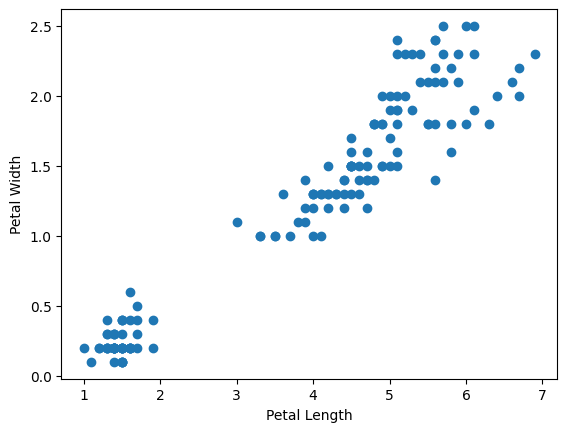

In [9]:
# Scatter plot of Petal_Length vs Petal_Width
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()



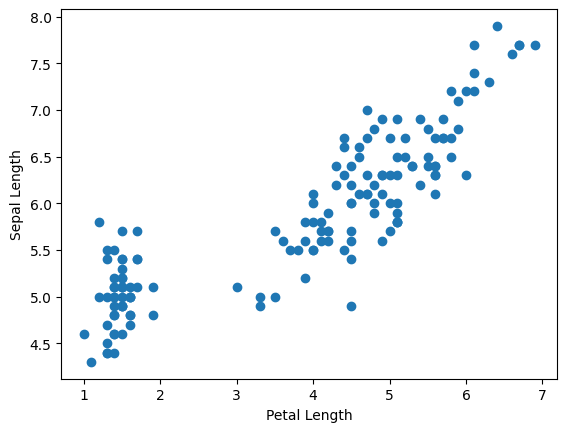

In [13]:
# Scatter plot of Petal_Length vs Sepal_Length

plt.scatter(dataset.Petal_Length,dataset.Sepal_Length)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.show()


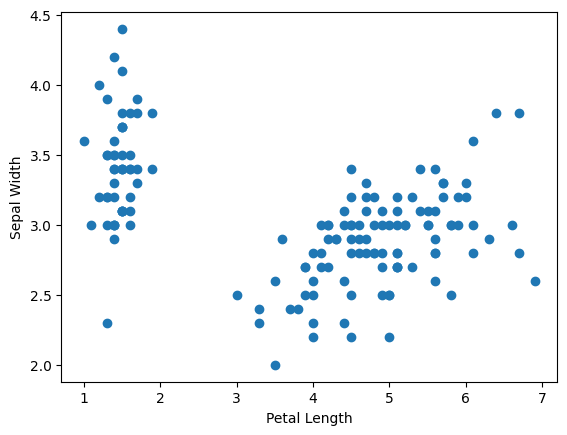

In [14]:
# Scatter plot of Petal_Length vs Sepal_Width

plt.scatter(dataset.Petal_Length,dataset.Sepal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.show()


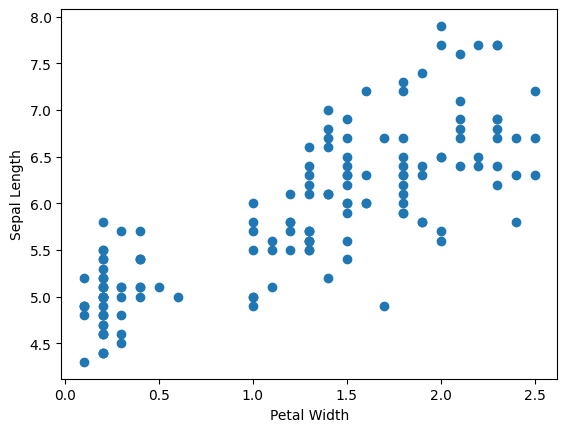

In [15]:
# Scatter plot of Petal_Width vs Sepal_Length

plt.scatter(dataset.Petal_Width,dataset.Sepal_Length)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

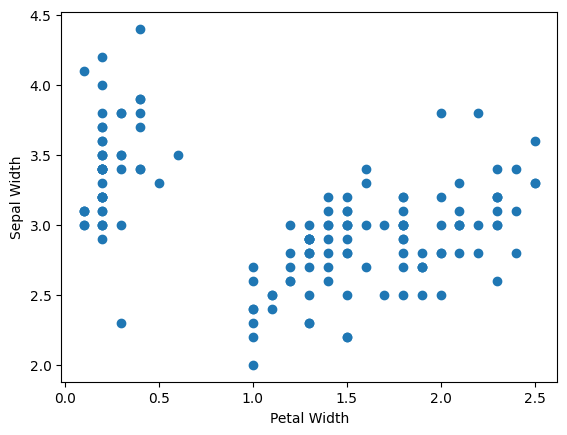

In [16]:
# Scatter plot of Petal_Width vs Sepal_Width

plt.scatter(dataset.Petal_Width,dataset.Sepal_Width)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.show()

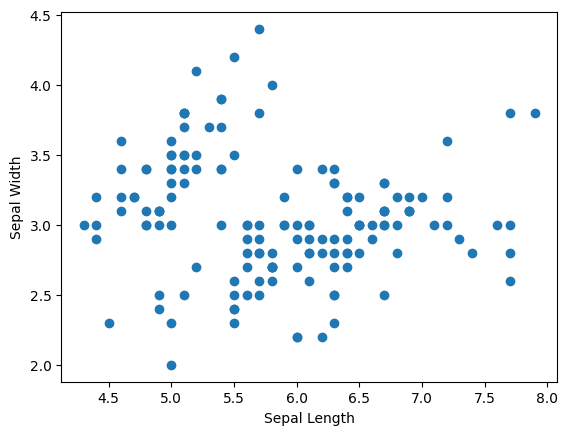

In [17]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.scatter(dataset.Sepal_Length,dataset.Sepal_Width)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


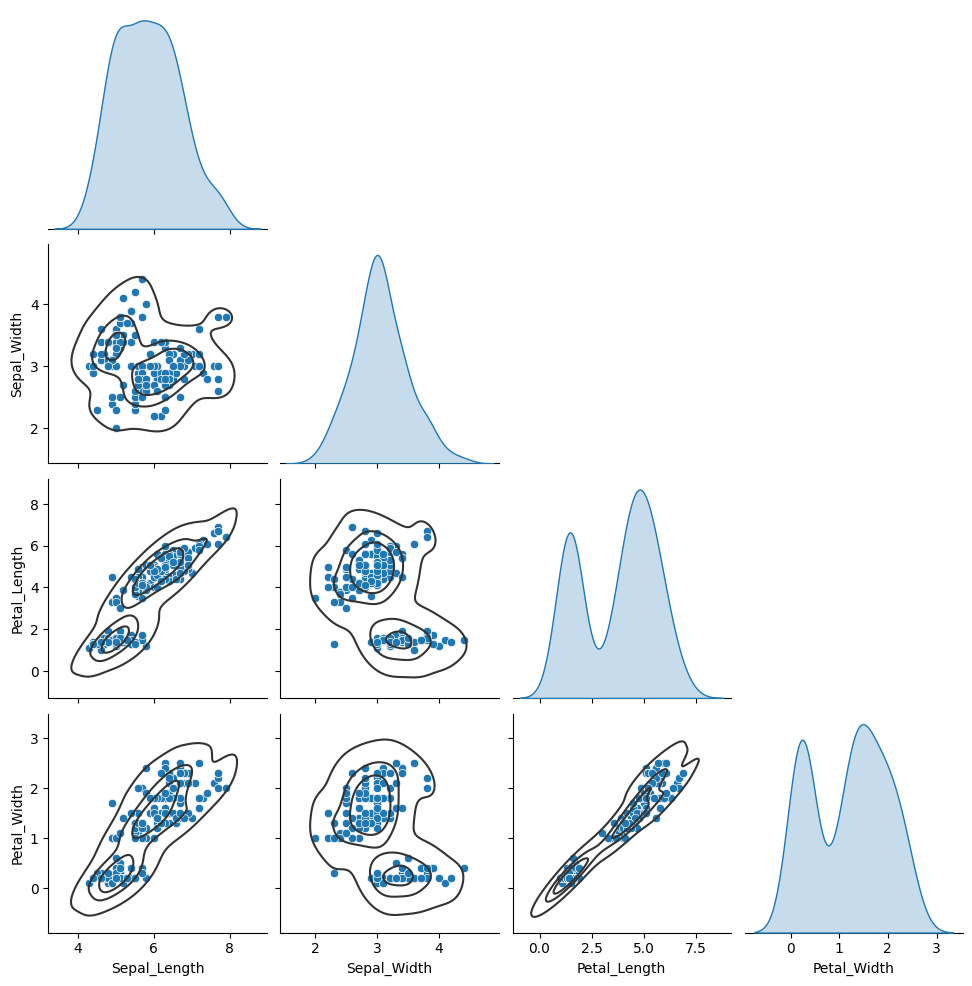

In [20]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], corner=True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

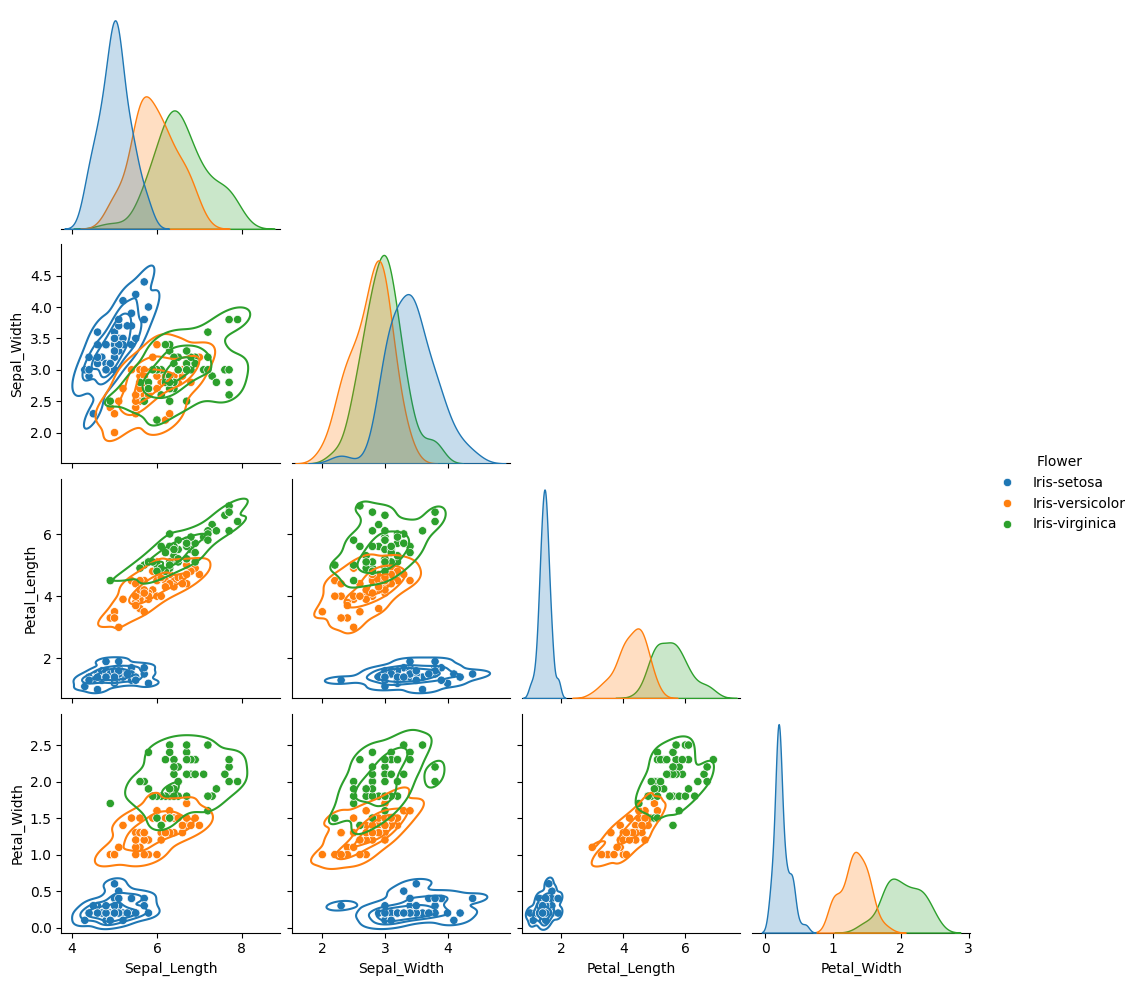

In [21]:
# Pairplot: Scatterplot of all variables (not the flower type)

# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset, corner=True, diag_kind="kde", hue='Flower')
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [41]:
# Map flower names to numerical values (0, 1, 2)
flower_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
dataset['Flower'] = dataset['Flower'].map(flower_mapping)

# Split the dataset by flower type
df1 = dataset[dataset.Flower == 0]
df2 = dataset[dataset.Flower == 1]
df3 = dataset[dataset.Flower == 2]


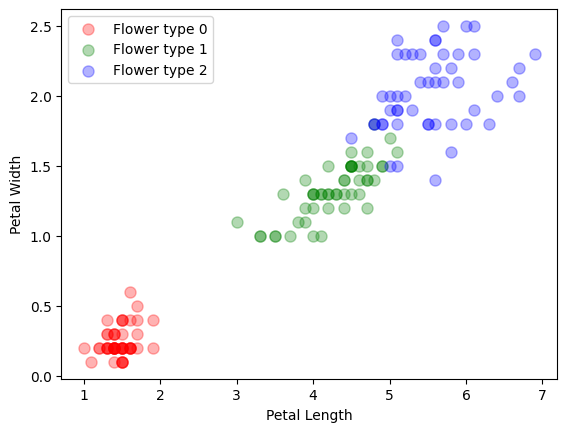

In [39]:
# Scatter plot of each real cluster for Petal

plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

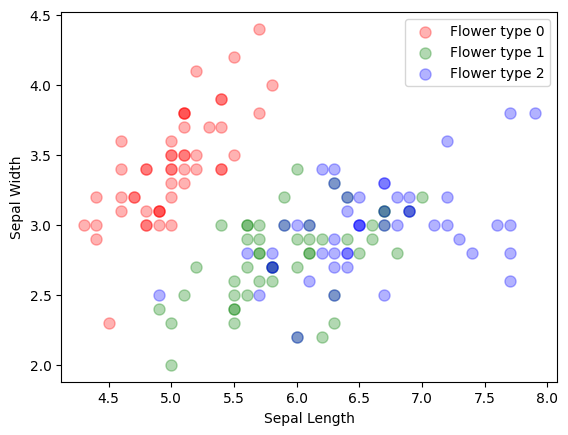

In [40]:
# Scatter plot of each real cluster for Sepal

plt.scatter(df1.Sepal_Length, df1.Sepal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [42]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
X  = dataset[["Petal_Length", "Petal_Width"]].values
X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values


In [43]:
# Understand the data X
print(X[:5])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


In [44]:
# Understand the data y
print(y[:5])

[nan nan nan nan nan]


In [45]:
# Calculate the number of observations in the dataset
print("Number of observations:", X.shape[0])

Number of observations: 150


In [46]:
# Calculate the number of observations for class 0

print("Number of observations for class 0:", np.sum(y == 0))

Number of observations for class 0: 0


In [47]:
# Calculate the number of observations for class 1

print("Number of observations for class 1:", np.sum(y == 1))

Number of observations for class 1: 0


In [48]:
# Calculate the number of observations for class 2
print("Number of observations for class 2:", np.sum(y == 2))


Number of observations for class 2: 0


# Train a classifier

## Train the classification model

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

classifier = LogisticRegression(max_iter=200)

classifier.fit(X, y)

print("Model trained successfully!")




Model trained successfully!


## Predict the class of a new observation

In [117]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [118]:
# Make a prediction for the new observation
predicted_class = classifier.predict(xnew)
print("Predicted class for new observation:", predicted_class)


Predicted class for new observation: [0]


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [ ]:
# Import sklearn train_test_split
 #ALREADY DO IT

# Split data in train and test sets
  #ALREADY DO IT


In [130]:
# Number of observations in the test set
print("Number of observations in the test set:", X_test.shape[0])


Number of observations in the test set: 30


In [131]:
# Number of observations for each class in the test set
print("Number of observations of each class in the test set:", pd.Series(y_test).value_counts())


Number of observations of each class in the test set: 2    11
0    10
1     9
Name: count, dtype: int64


In [132]:
# Number of observations in the test set
print("Number of observations in the train set:", X_train.shape[0])


Number of observations in the train set: 120


In [133]:
# Number of observations of each class in the test set
print("Number of observations of each class in the train set:", pd.Series(y_train).value_counts())


Number of observations of each class in the train set: 1    41
0    40
2    39
Name: count, dtype: int64


## Train the classification model

## Test the classification model

In [134]:
# Make the predictions using the test set
y_pred = classifier.predict(xnew)
y_pred = classifier.predict(X_test)


In [148]:
# Explore real and predicted labels
print("Real labels:", y_test)
print("Predicted labels:", y_pred)



Real labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Predicted labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


## Compute the acurracy

In [136]:
# Define a function to compute accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [137]:
# Calculate total accuracy
accuracy_total = accuracy(y_test, y_pred)
print("Total accuracy:", accuracy_total)


Total accuracy: 1.0


In [138]:
# Calculate total accuracy using sklearn.metrics
from sklearn.metrics import accuracy_score
accuracy_total = accuracy_score(y_test, y_pred)
print("Total accuracy on test set:", accuracy_total)



Total accuracy on test set: 1.0


In [139]:
# Compute accuracy for class 0
accuracy_class_0 = accuracy(y_test[y_test == 0], y_pred[y_test == 0])
print("Accuracy for class 0:", accuracy_class_0)


Accuracy for class 0: 1.0


In [140]:
# Compute accuracy for class 1
accuracy_class_1 = accuracy(y_test[y_test == 1], y_pred[y_test == 1])
print("Accuracy for class 1:", accuracy_class_1)



Accuracy for class 1: 1.0


In [141]:
# Compute accuracy for class 2
accuracy_class_2 = accuracy(y_test[y_test == 2], y_pred[y_test == 2])
print("Accuracy for class 2:", accuracy_class_2)


Accuracy for class 2: 1.0


In [145]:
print(dataset['Flower'].value_counts())
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Flower
0    50
1    50
2    50
Name: count, dtype: int64
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Confussion matrix

In [142]:
# Compute confussion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

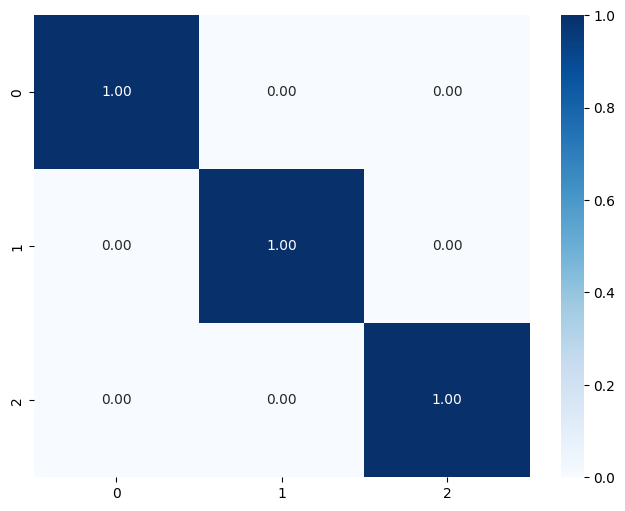

In [114]:
# Plot normalized confussion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=dataset['Flower'].unique(), yticklabels=dataset['Flower'].unique())
plt


# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?


2) Using the four variables, try with two classifiers. Which provides the best performance?

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train-test split
X_all = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
y = dataset["Flower"].values
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

# --- 1) Compare accuracy using different sets of variables ---

# (a) Using the four variables
X_all_train, X_all_test = X_train, X_test
classifier_all = LogisticRegression(max_iter=200)
classifier_all.fit(X_all_train, y_train)
y_pred_all = classifier_all.predict(X_all_test)
accuracy_all = accuracy_score(y_test, y_pred_all)

# (b) Using the two petal variables
X_petal = dataset[["Petal_Length", "Petal_Width"]].values
X_petal_train, X_petal_test = train_test_split(X_petal, test_size=0.2, random_state=42)[0:2]
classifier_petal = LogisticRegression(max_iter=200)
classifier_petal.fit(X_petal_train, y_train)
y_pred_petal = classifier_petal.predict(X_petal_test)
accuracy_petal = accuracy_score(y_test, y_pred_petal)

# (c) Using the two sepal variables
X_sepal = dataset[["Sepal_Length", "Sepal_Width"]].values
X_sepal_train, X_sepal_test = train_test_split(X_sepal, test_size=0.2, random_state=42)[0:2]
classifier_sepal = LogisticRegression(max_iter=200)
classifier_sepal.fit(X_sepal_train, y_train)
y_pred_sepal = classifier_sepal.predict(X_sepal_test)
accuracy_sepal = accuracy_score(y_test, y_pred_sepal)

# Compare accuracies
print(f"Accuracy using all four variables: {accuracy_all:.4f}")
print(f"Accuracy using petal variables: {accuracy_petal:.4f}")
print(f"Accuracy using sepal variables: {accuracy_sepal:.4f}")

# --- 2) Using the four variables, compare two classifiers ---

# Logistic Regression Classifier
classifier_lr = LogisticRegression(max_iter=200)
classifier_lr.fit(X_all_train, y_train)
y_pred_lr = classifier_lr.predict(X_all_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# K-Nearest Neighbors Classifier
classifier_knn = KNeighborsClassifier(n_neighbors=3)
classifier_knn.fit(X_all_train, y_train)
y_pred_knn = classifier_knn.predict(X_all_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Compare classifiers' performance
print(f"Logistic Regression accuracy: {accuracy_lr:.4f}")
print(f"K-Nearest Neighbors accuracy: {accuracy_knn:.4f}")


Accuracy using all four variables: 1.0000
Accuracy using petal variables: 1.0000
Accuracy using sepal variables: 0.9000
Logistic Regression accuracy: 1.0000
K-Nearest Neighbors accuracy: 1.0000
